In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("heart_v2_csv - Copy1.csv")
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [5]:
df.shape

(270, 5)

In [7]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [11]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

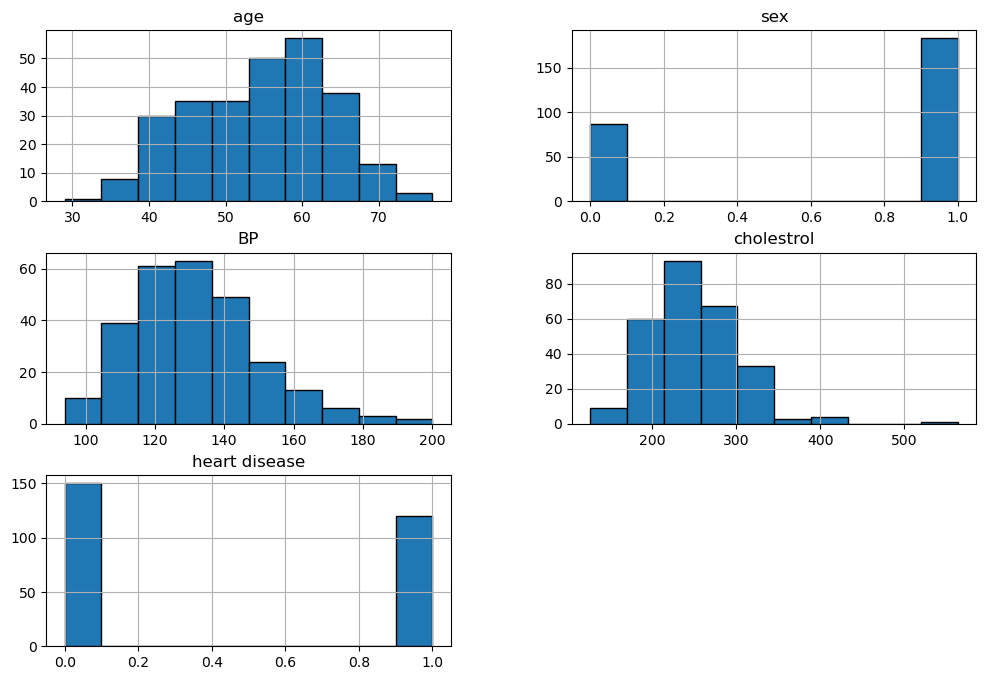

In [15]:
df.hist(bins=10,edgecolor="Black",figsize=(12,8))
plt.show()

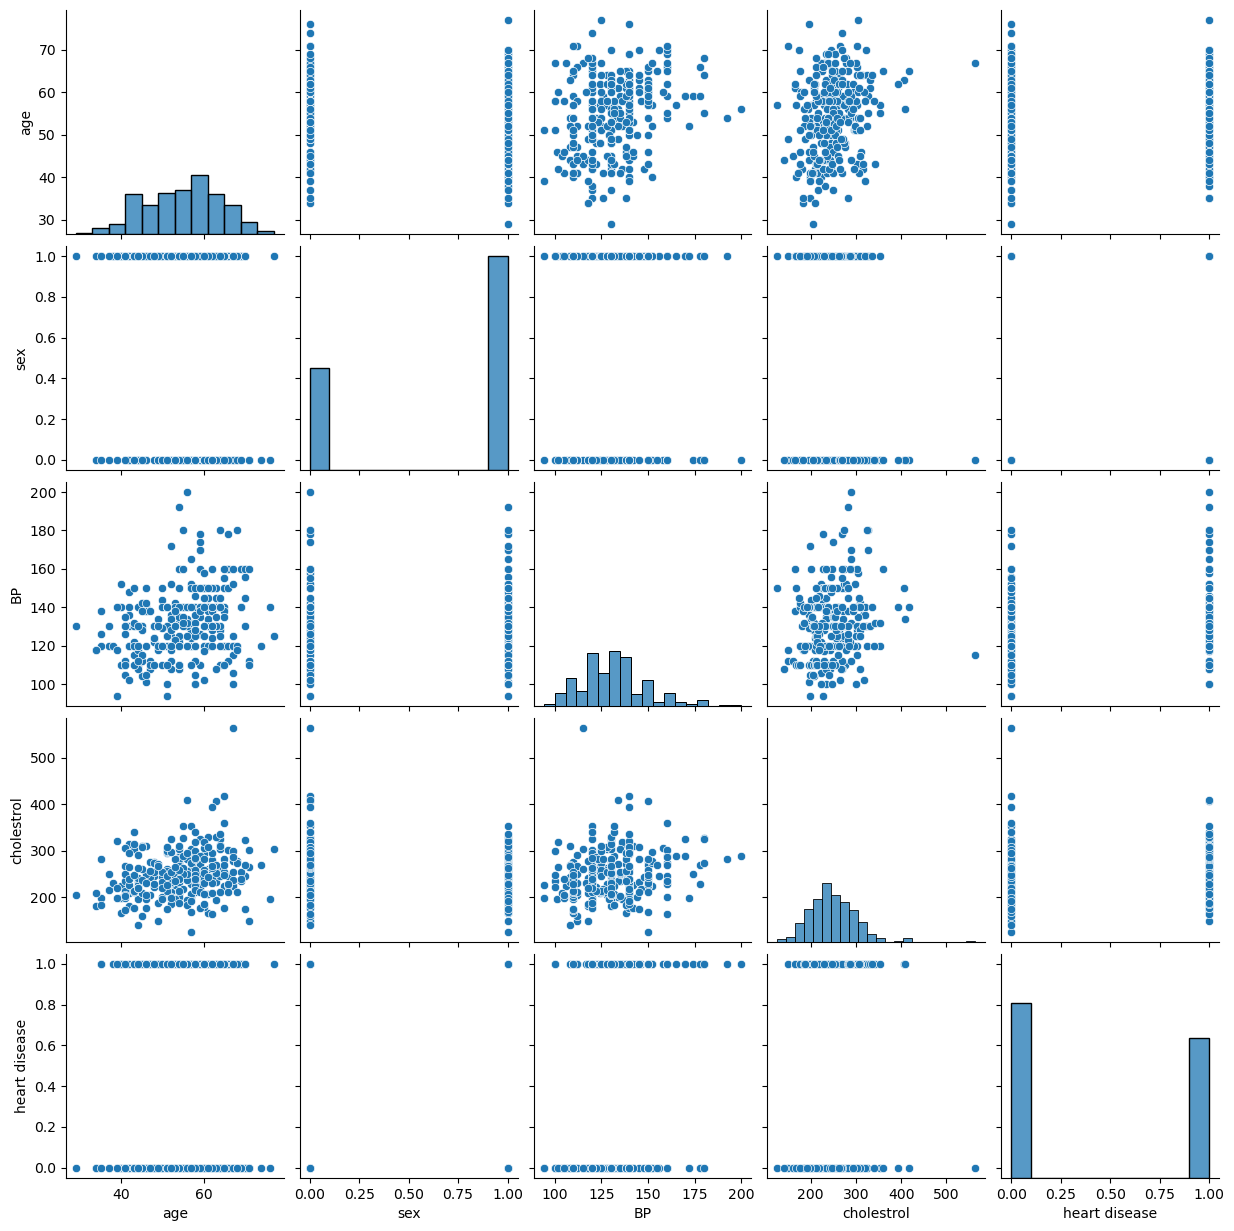

In [31]:
sns.pairplot(df)
plt.show()

In [17]:
x=df.iloc[:,:-1]
x

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [21]:
y=df["heart disease"]
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

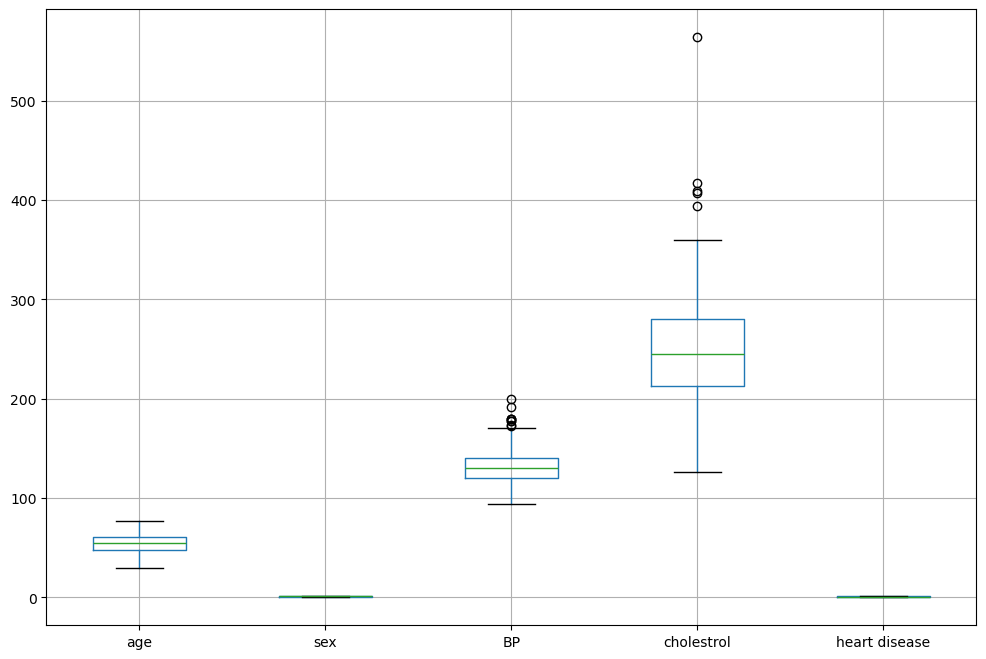

In [25]:
df.boxplot(figsize=(12,8))
plt.show()

In [33]:
Q1 = df['BP'].quantile(0.25)
Q3 = df['BP'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['BP'] >= (Q1 - 1.5 * IQR)) & (df['BP'] <= (Q3 + 1.5 * IQR))]

In [35]:
Q1 = df['cholestrol'].quantile(0.25)
Q3 = df['cholestrol'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['cholestrol'] >= (Q1 - 1.5 * IQR)) & (df['cholestrol'] <= (Q3 + 1.5 * IQR))]

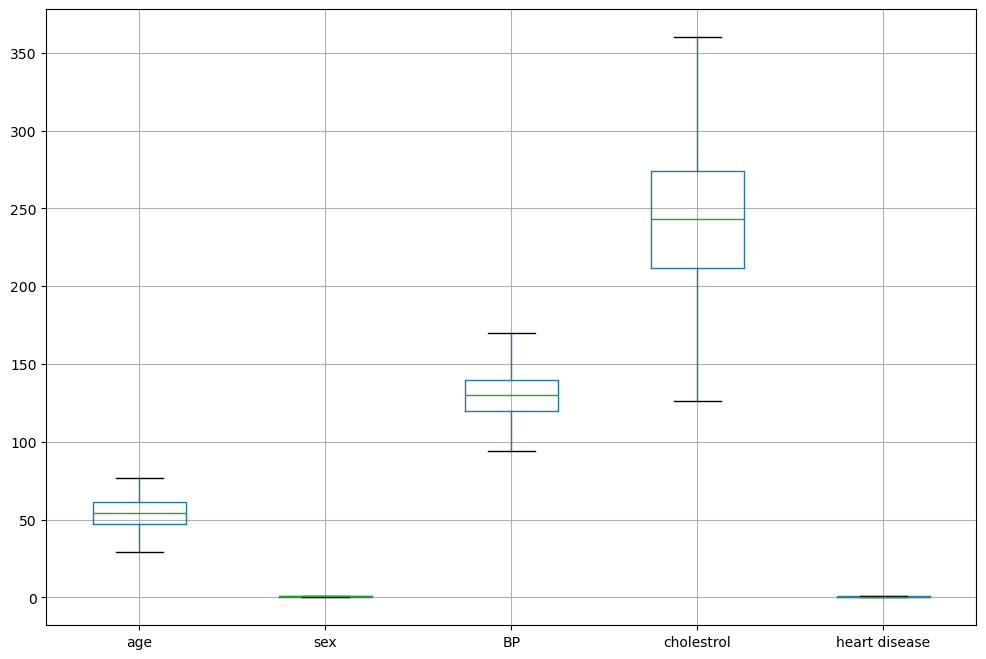

In [37]:
df.boxplot(figsize=(12,8))
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1,n_jobs=-1,n_estimators=100,max_depth=5,oob_score=True)

In [51]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=1)

In [53]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
model.oob_score_

0.6342592592592593

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.59      0.48      0.53        21

    accuracy                           0.67        54
   macro avg       0.65      0.63      0.63        54
weighted avg       0.66      0.67      0.66        54



In [61]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[26,  7],
       [11, 10]], dtype=int64)

In [63]:
print(accuracy_score(y_test, y_pred))

0.6666666666666666


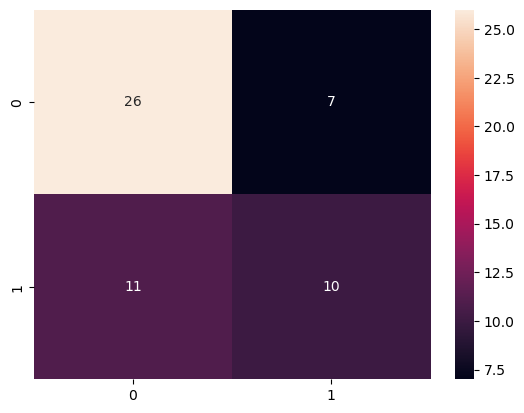

In [65]:
sns.heatmap(cm, annot=True)
plt.show()